In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV

In [15]:
# Set seaborn style
sns.set(style="whitegrid", palette="Blues")

# Load dataset with selected columns
columns = ['Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 
           'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 
           'Productivity Score', 'Mood Score', 'Stress Level']
df = pd.read_csv('data/sleep_cycle_productivity.csv', usecols=columns)

In [16]:
# Display basic info
display(df.head())
display(df.info())

,Total Sleep Hours,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,5.28,86,87,116,8.808920,8,3,6
1,5.41,32,21,88,6.329833,10,3,7
2,5.35,17,88,59,8.506306,10,9,10
3,7.55,46,34,80,6.070240,8,4,2
4,6.75,61,269,94,11.374994,8,7,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total Sleep Hours              5000 non-null   float64
 1   Exercise (mins/day)            5000 non-null   int64  
 2   Caffeine Intake (mg)           5000 non-null   int64  
 3   Screen Time Before Bed (mins)  5000 non-null   int64  
 4   Work Hours (hrs/day)           5000 non-null   float64
 5   Productivity Score             5000 non-null   int64  
 6   Mood Score                     5000 non-null   int64  
 7   Stress Level                   5000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.6 KB


None

In [17]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Select the top 2 correlated variables with Productivity Score
target = 'Productivity Score'
correlations = correlation_matrix[target].drop(target).abs()
top2_features = correlations.nlargest(2).index.tolist()
print(f"Top 2 correlated features with {target}: {top2_features}")

Top 2 correlated features with Productivity Score: ['Exercise (mins/day)', 'Total Sleep Hours']


In [18]:
# Compute Pearson and Spearman correlations
pearson_corr = df[top2_features + [target]].corr(method='pearson')
spearman_corr1, _ = spearmanr(df[top2_features[0]], df[target])
spearman_corr2, _ = spearmanr(df[top2_features[1]], df[target])
print(f"Spearman correlation for {top2_features[0]}: {spearman_corr1}")
print(f"Spearman correlation for {top2_features[1]}: {spearman_corr2}")

Spearman correlation for Exercise (mins/day): -0.02450090350018176
Spearman correlation for Total Sleep Hours: 0.018929915202847175


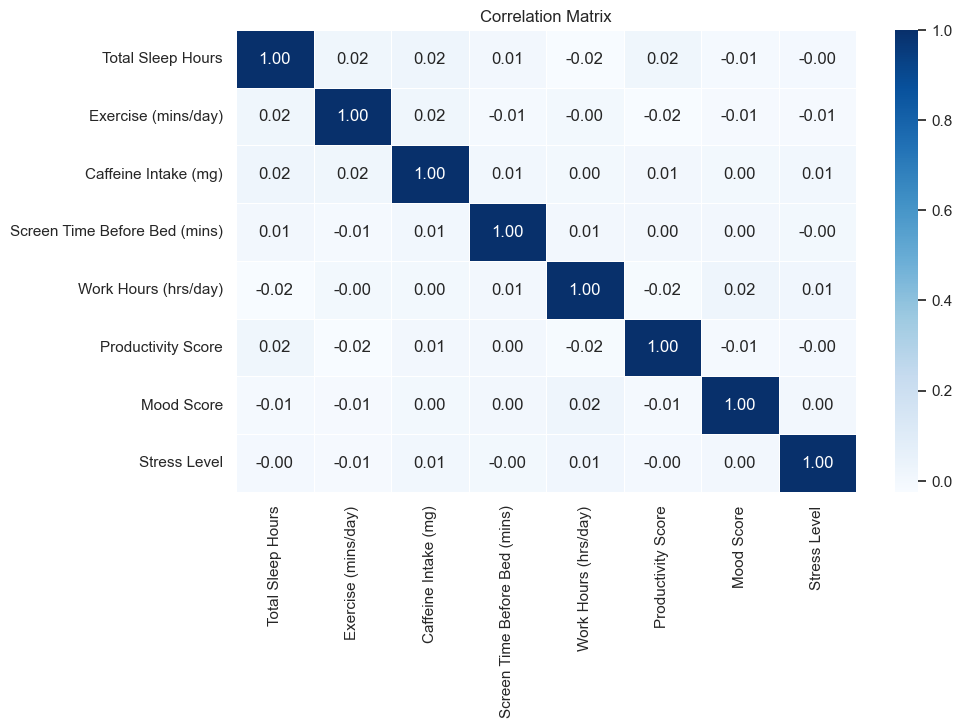

In [19]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

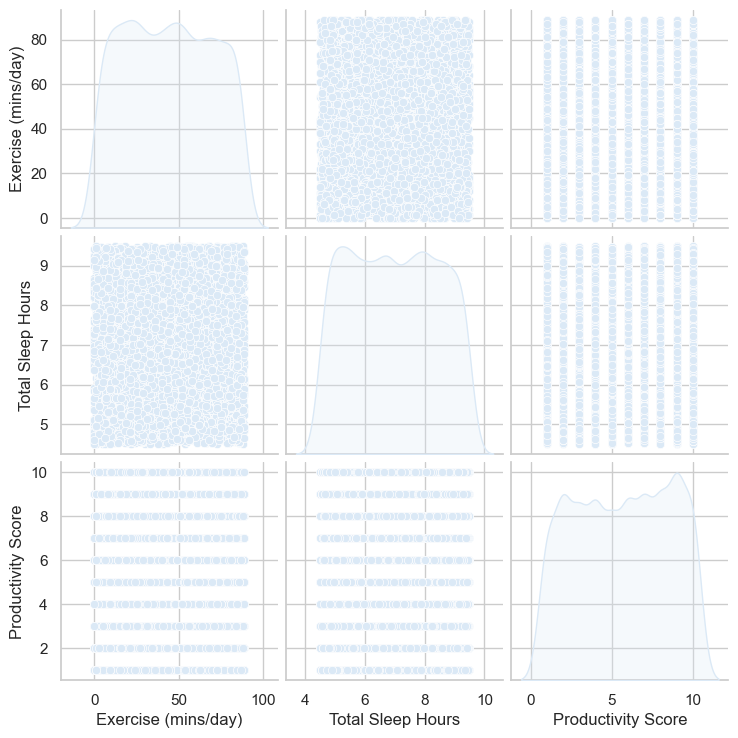

In [20]:
# Pairplot for top correlated features
sns.pairplot(df[top2_features + [target]], diag_kind='kde')
plt.show()

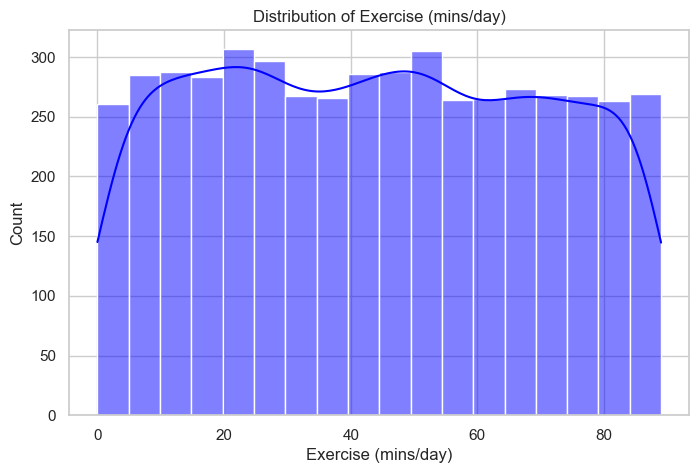

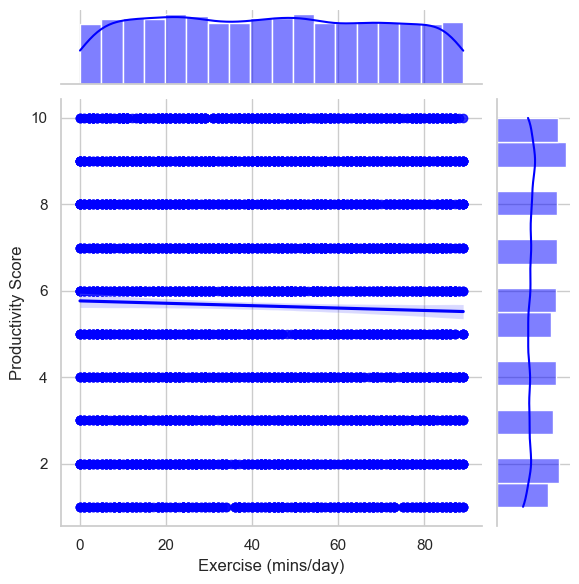

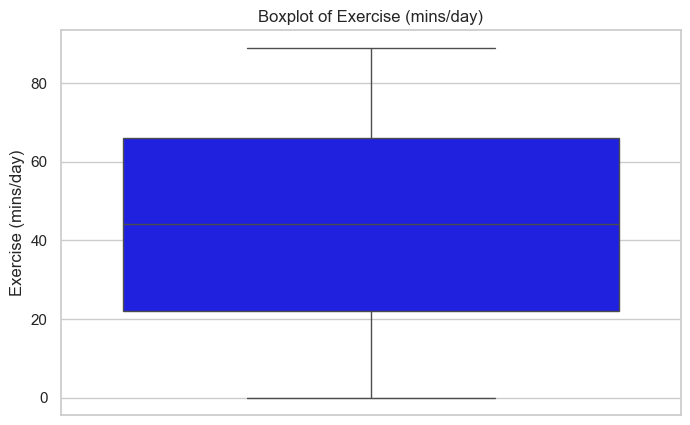

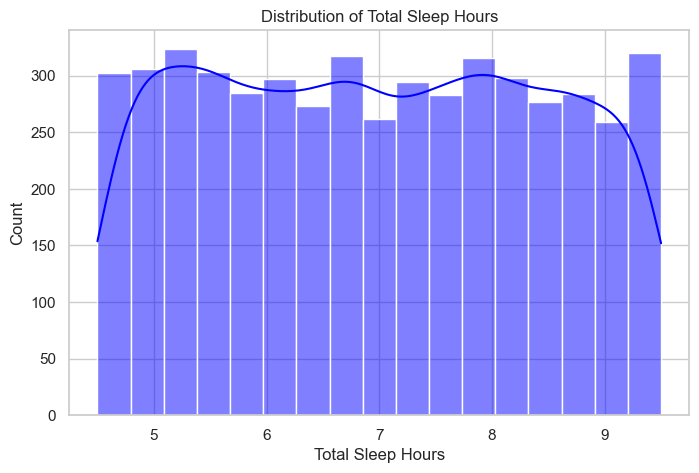

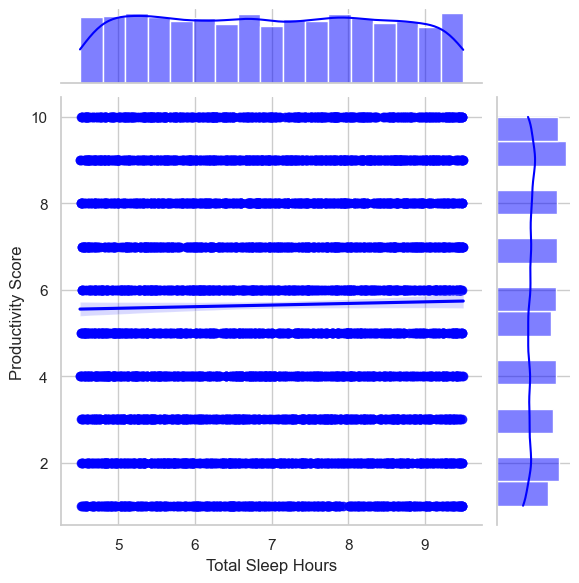

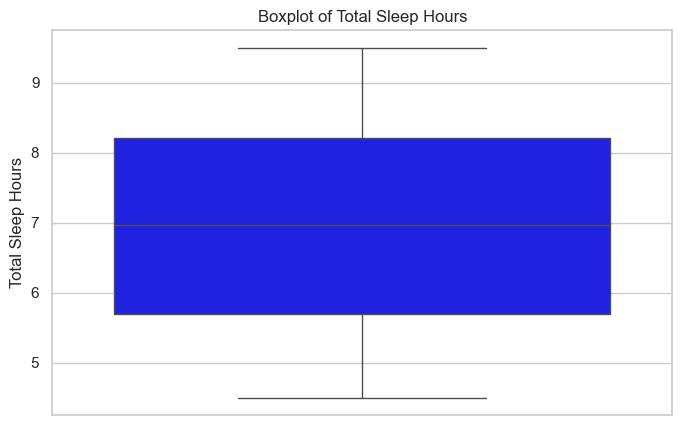

In [21]:
# Visualize distributions and scatter plots
for feature in top2_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.show()

    sns.jointplot(data=df, x=feature, y=target, kind='reg', height=6, color='blue')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[feature], color="blue")
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [22]:
# Normalization and Scaling
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[top2_features] = scaler.fit_transform(df_scaled[top2_features])

minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[top2_features] = minmax_scaler.fit_transform(df_normalized[top2_features])

In [25]:
# Feature selection using Lasso Regression
X = df.drop(columns=[target])
y = df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

LassoCV(cv=5, random_state=42)

In [26]:
# Extract feature importance
feature_importance = pd.Series(lasso.coef_, index=X.columns)
important_features = feature_importance[feature_importance != 0].index.tolist()
print(f"Features selected by Lasso: {important_features}")

Features selected by Lasso: ['Total Sleep Hours', 'Exercise (mins/day)', 'Work Hours (hrs/day)']
